# Bibliotecas

In [1]:
from madeiras import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from UQpy.distributions import Normal
from UQpy.reliability import FORM
from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel

c:\Users\user\Documents\wanderpy\reliabridge\myenv\Lib\site-packages\UQpy\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Execução da otimização

In [2]:
df = pd.read_excel("beam_data.xlsx")
df = df.to_dict(orient="records")
df = df[0] 
df

{'l (cm)': 600,
 'b_wpista (cm)': 900,
 'tipo_secao_longarina': 'Circular',
 'tipo_secao_tabuleiro': 'Retangular',
 'p_gk (kN/m²)': 1,
 'p_rodak (kN)': 40,
 'p_qk (kN/m²)': 4,
 'a (m)': 1.5,
 'classe_carregamento': 'permanente',
 'classe_madeira': 'madeira natural',
 'classe_umidade': 1,
 'gamma_g': 1.4,
 'gamma_q': 1.3,
 'gamma_w': 1.4,
 'psi_2': 0.3,
 'phi': 0.8,
 'densidade longarina (kg/m³)': 350,
 'resistência característica à flexão longarina (MPa)': 50,
 'resistência característica ao cisalhamento longarina (MPa)': 20,
 'módulo de elasticidade à flexão longarina (GPa)': 12,
 'densidade tabuleiro (kg/m³)': 350,
 'resistência característica à flexão tabuleiro (MPa)': 40}

In [3]:
ds = [30, 150]
esps = [30, 200]
bws = [12, 60]
hs = [12, 60]
res_nsga = chamando_nsga2(df, ds, esps, bws, hs)
res_nsga

,d [cm],esp [cm],bw [cm],h [cm],area [m²],delta [m],flex lim beam [kPa],cis lim beam [kPa],delta lim beam [m],flex lim deck [kPa]
0,30.511080,199.623635,12.0,56.333592,0.140715,0.023029,-0.063412,-4806.981949,-0.000971,-13105.774298
1,30.000000,47.615104,12.0,12.000000,0.085086,0.004937,-12125.906676,-6745.447187,-0.008183,-15629.222455
2,30.243386,199.842452,12.0,52.732098,0.135116,0.023003,-3.431323,-4825.375117,-0.000997,-12530.804337
3,30.000000,66.115732,12.0,12.000000,0.085086,0.006020,-11398.314847,-6631.157330,-0.008183,-5064.449534
4,30.000000,47.615104,12.0,12.000000,0.085086,0.004937,-12125.906676,-6745.447187,-0.008183,-15629.222455
...,...,...,...,...,...,...,...,...,...,...
495,30.000000,199.999079,12.0,33.191397,0.110516,0.019002,-2674.347238,-5260.799702,-0.004998,-5515.519369
496,30.000000,196.980605,12.0,27.100809,0.103207,0.017291,-3824.287812,-5441.431945,-0.006709,-54.568197
497,30.000000,156.711323,12.0,23.215655,0.098545,0.013456,-6401.078960,-5846.193352,-0.008183,-47.826776
498,30.000000,185.263074,12.0,26.037138,0.101930,0.016151,-4590.317633,-5561.759628,-0.007849,-63.584906


# Fronteira eficiente

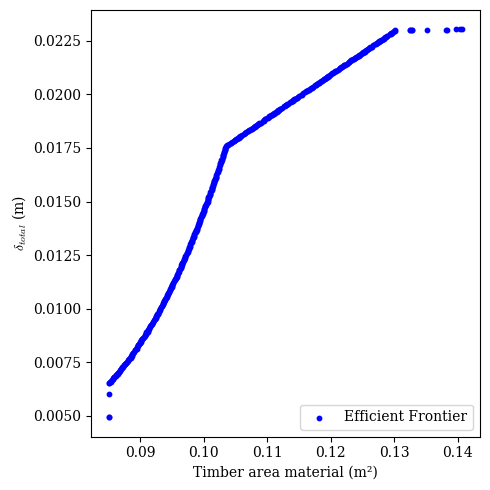

In [4]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [m]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='lower right',)
plt.tight_layout()
plt.show()

# Teste da função objetivo

In [37]:
# 1) Instancia o problema
df = pd.read_excel("beam_data.xlsx")
df = df.to_dict(orient="records")
df = df[0] 
df
problem = ProjetoOtimo(
                        l=df["l (cm)"],
                        p_gk=df["p_gk (kN/m²)"],
                        p_rodak=df["p_rodak (kN)"],
                        p_qk=df["p_qk (kN/m²)"],
                        a=df["a (m)"],
                        classe_carregamento=df["classe_carregamento"],
                        classe_madeira=df["classe_madeira"],
                        classe_umidade=df["classe_umidade"],
                        gamma_g=df["gamma_g"],
                        gamma_q=df["gamma_q"],
                        gamma_w=df["gamma_w"],
                        psi2=df["psi_2"],
                        phi=df["phi"],
                        densidade_long=df["densidade longarina (kg/m³)"],
                        densidade_tab=df["densidade tabuleiro (kg/m³)"],
                        f_mk_long=df["resistência característica à flexão longarina (MPa)"],
                        f_vk_long=df["resistência característica ao cisalhamento longarina (MPa)"],
                        e_modflex_long=df["módulo de elasticidade à flexão longarina (GPa)"],
                        f_mk_tab=df["resistência característica à flexão tabuleiro (MPa)"],
                        d_min=ds[0],
                        d_max=ds[1],
                        esp_min=esps[0],
                        esp_max=esps[1],
                        bw_min=bws[0],
                        bw_max=bws[1],
                        h_min=hs[0],
                        h_max=hs[1],
                    )

# 2) Define uma solução manual
x_manual = np.array([[34., 120.0, 10., 30.]])   # d, esp, bw, h

# 3) Avalia
out = problem.evaluate(x_manual, return_values_of=["F", "G"])

# 4) Imprime resultados
f = out[0]
g = out[1]
print(f, g)

[[ 0.12079203 -0.00732769]] [[-1.17363781e+04 -6.63230526e+03 -1.17119884e-02 -8.90250230e+03]]


# Monte Carlo

Total amostras: 25000
Viáveis: 24266


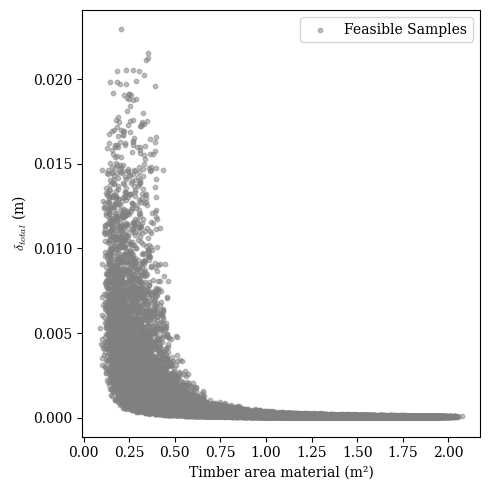

In [6]:
# ---------------------------
# Monte Carlo + filtro viável
# ---------------------------
N = 25000
rng = np.random.default_rng(123)

# amostra uniformemente no intervalo do problema
d_mc = rng.uniform(problem.xl[0], problem.xu[0], size=N)
X_mc = d_mc.reshape(-1, 1)   # shape (N,1)
esp_mc = rng.uniform(problem.xl[1], problem.xu[1], size=N)
bw_mc = rng.uniform(problem.xl[2], problem.xu[2], size=N)
h_mc = rng.uniform(problem.xl[3], problem.xu[3], size=N)
X_mc = np.column_stack((d_mc, esp_mc, bw_mc,  h_mc))  # shape (N,4)

# avalia em lote
out = problem.evaluate(X_mc, return_values_of=["F", "G"])
F = np.asarray(out[0])   # shape (N,2)
G = np.asarray(out[1])   # shape (N,4)

# filtro de viabilidade: todas restrições <= 0
mask_feas = np.all(G <= 0.0, axis=1)

F_feas = F[mask_feas]
G_feas = G[mask_feas]
X_feas = X_mc[mask_feas]

print("Total amostras:", N)
print("Viáveis:", int(mask_feas.sum()))

# ---------------------------
# Scatter plot (f1 vs f2)
# ---------------------------
# Se seu f2 = -delta, converta para delta positivo no plot:
F_plot = F_feas.copy()
F_plot[:, 1] = -F_plot[:, 1]

plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

# Unindo as duas soluções

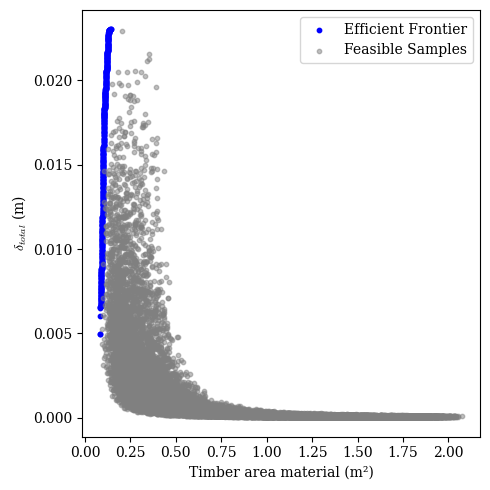

In [7]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [m]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

# Confiabilidade

In [8]:
df = pd.read_excel("beam_data.xlsx")
df = df.loc[0]
p_gk = float(df["p_gk (kN/m²)"])
p_rodak = float(df["p_rodak (kN)"])
p_qk = float(df["p_qk (kN/m²)"])
a = float(df["a (m)"])
l = float(df["l (cm)"])
classe_carregamento = df["classe_carregamento"]
classe_madeira = df["classe_madeira"]
classe_umidade = df["classe_umidade"]
f_mk = float(df["resistência característica à flexão longarina (MPa)"])
f_vk = float(df["resistência característica ao cisalhamento longarina (MPa)"])
e_modflex = float(df["módulo de elasticidade à flexão longarina (GPa)"])
f_mktab = float(df["resistência característica à flexão tabuleiro (MPa)"])
densidade_long = float(df["densidade longarina (kg/m³)"])
densidade_tab = float(df["densidade tabuleiro (kg/m³)"])
d = 35.
esp = 120.0
bw = 11.0
h = 30.0

In [9]:
samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
params = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flexao"]
obj_confia(samples, params)

array([23372.65352456])

In [10]:
beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao")
beta, pf

(7.120431659634995, 5.379478505982643e-13)

In [11]:
sm, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao", method="IS")
beta, pf

(9.262340089798409, 0.0)

In [12]:
pf

0.0

In [13]:
df = pd.DataFrame(sm.samples)
df


,0,1,2,3,4,5,6,7,8
0,1.261713,40.332522,3.680689,42.742388,14.344494,10.505214,32.460459,363.624352,321.373159
1,1.132236,42.159989,4.063433,36.991407,17.632885,10.716895,33.477062,412.155191,422.160034
2,1.110089,35.742486,7.442721,43.996842,18.976632,11.139894,27.620866,356.175141,411.276496
3,1.215478,50.918949,5.299062,46.958649,15.474678,9.612648,29.639504,389.668990,374.435713
4,1.269752,40.881068,4.524493,41.806236,17.973795,10.016245,37.473919,351.483560,378.063540
...,...,...,...,...,...,...,...,...,...
99995,1.163487,51.780019,4.148923,44.492855,18.499693,12.014050,32.657034,355.512243,335.119220
99996,1.206512,36.253195,5.017667,38.808164,14.830742,10.811258,29.027935,421.823851,368.467238
99997,1.333899,37.863507,4.515832,41.635987,17.450502,10.302034,32.161794,392.374890,419.369290
99998,1.220012,45.286923,4.494241,41.610034,20.032779,10.102064,33.125313,407.314027,336.596218


In [14]:
model = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=params)
rmodel = RunModel(model=model)
rmodel.run(samples=sm.samples)
rmodel.qoi_list

[array([19061.24032329]),
 array([14993.07282091]),
 array([16292.91739056]),
 array([19962.21468978]),
 array([17530.64022697]),
 array([18602.74762223]),
 array([20570.64529534]),
 array([23838.43356304]),
 array([19426.42994048]),
 array([14793.18466031]),
 array([17230.57834433]),
 array([16623.24154138]),
 array([18083.31696154]),
 array([17330.34214735]),
 array([18988.76313916]),
 array([18624.13803976]),
 array([17281.97712355]),
 array([21698.45528244]),
 array([20571.79598554]),
 array([14332.72938512]),
 array([18773.25852611]),
 array([19426.88279292]),
 array([11872.11342712]),
 array([18020.62984277]),
 array([24087.57345865]),
 array([17362.05342229]),
 array([18723.03013304]),
 array([21498.65133705]),
 array([16586.88524225]),
 array([21428.87648579]),
 array([21054.670732]),
 array([14585.20379887]),
 array([16917.42416214]),
 array([20789.49919113]),
 array([16397.48709606]),
 array([19962.81235465]),
 array([20303.62307285]),
 array([20842.09161064]),
 array([17614.

In [15]:
samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
paramss = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flecha"]
obj_confia(samples, paramss)

array([0.02690753])

In [16]:
beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha")
beta, pf

(nan, nan)

In [17]:
sf, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha", method="IS")
beta, pf

(9.262340089798409, 0.0)

In [18]:
sf.samples

array([[  1.26171268,  40.33252213,   3.68068896, ...,  32.46045932,
        363.62435163, 321.37315897],
       [  1.13223615,  42.15998854,   4.06343262, ...,  33.47706178,
        412.15519087, 422.16003432],
       [  1.11008928,  35.74248629,   7.44272145, ...,  27.62086575,
        356.17514082, 411.27649584],
       ...,
       [  1.33389852,  37.86350724,   4.51583239, ...,  32.16179419,
        392.37488993, 419.36929034],
       [  1.22001237,  45.28692299,   4.49424053, ...,  33.12531311,
        407.31402703, 336.59621776],
       [  1.23442439,  40.33102358,   4.2953076 , ...,  36.80060692,
        347.39322028, 387.22616197]])

In [19]:
modelf = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=paramss)
rmodelf = RunModel(model=modelf)
rmodelf.run(samples=sf.samples)
rmodelf.qoi_list

[array([0.02601372]),
 array([0.02538889]),
 array([0.02146337]),
 array([0.0226008]),
 array([0.02415808]),
 array([0.02403641]),
 array([0.02611401]),
 array([0.02465815]),
 array([0.02694172]),
 array([0.02582894]),
 array([0.02566891]),
 array([0.02340165]),
 array([0.02665807]),
 array([0.02385208]),
 array([0.02543084]),
 array([0.02618917]),
 array([0.02467585]),
 array([0.02413531]),
 array([0.02678887]),
 array([0.02564185]),
 array([0.02045353]),
 array([0.02249887]),
 array([0.02499227]),
 array([0.02648082]),
 array([0.02417521]),
 array([0.02653267]),
 array([0.02583423]),
 array([0.02585117]),
 array([0.02494241]),
 array([0.02545844]),
 array([0.02642929]),
 array([0.02508977]),
 array([0.02277092]),
 array([0.02218676]),
 array([0.02444141]),
 array([0.02077733]),
 array([0.02462105]),
 array([0.02564464]),
 array([0.02597447]),
 array([0.02497187]),
 array([0.02647756]),
 array([0.0244313]),
 array([0.02545206]),
 array([0.02546753]),
 array([0.026724]),
 array([0.0223

In [20]:
import numpy as np

valores = np.array(rmodelf.qoi_list).flatten()
quantidade_negativos = np.count_nonzero(valores < 0.0)
quantidade_negativos

0